In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [20]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [21]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [22]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [23]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [24]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [25]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [26]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [27]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [29]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [30]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [31]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [32]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [01:06,  1.77it/s]


Epoch 1 of 100
Generator loss: 1.30920138, Discriminator loss: 0.92968975


118it [01:10,  1.67it/s]


Epoch 2 of 100
Generator loss: 1.54344665, Discriminator loss: 1.17962349


118it [01:06,  1.78it/s]


Epoch 3 of 100
Generator loss: 5.20664049, Discriminator loss: 0.35438542


118it [01:06,  1.78it/s]


Epoch 4 of 100
Generator loss: 3.22890582, Discriminator loss: 0.95277998


118it [01:05,  1.79it/s]


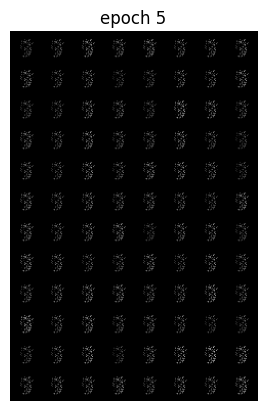

Epoch 5 of 100
Generator loss: 1.36911372, Discriminator loss: 0.98310649


118it [01:05,  1.81it/s]


Epoch 6 of 100
Generator loss: 1.76964626, Discriminator loss: 1.07692838


118it [01:06,  1.77it/s]


Epoch 7 of 100
Generator loss: 1.70629905, Discriminator loss: 0.93628421


118it [01:05,  1.80it/s]


Epoch 8 of 100
Generator loss: 1.42466390, Discriminator loss: 1.03158009


118it [01:06,  1.77it/s]


Epoch 9 of 100
Generator loss: 2.72478562, Discriminator loss: 0.97761705


118it [01:05,  1.81it/s]


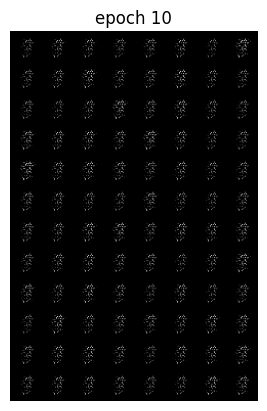

Epoch 10 of 100
Generator loss: 1.89263621, Discriminator loss: 1.28015343


118it [01:14,  1.59it/s]


Epoch 11 of 100
Generator loss: 11.12034195, Discriminator loss: 0.96482105


118it [01:07,  1.75it/s]


Epoch 12 of 100
Generator loss: 2.11766725, Discriminator loss: 0.91539174


118it [01:05,  1.79it/s]


Epoch 13 of 100
Generator loss: 1.81749268, Discriminator loss: 0.97861491


118it [01:06,  1.78it/s]


Epoch 14 of 100
Generator loss: 2.48121816, Discriminator loss: 1.05903749


118it [01:06,  1.78it/s]


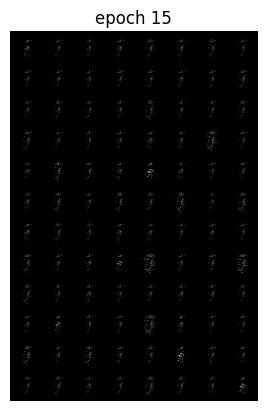

Epoch 15 of 100
Generator loss: 0.86390011, Discriminator loss: 1.14835607


118it [01:05,  1.80it/s]


Epoch 16 of 100
Generator loss: 1.81742989, Discriminator loss: 0.81240385


118it [01:07,  1.75it/s]


Epoch 17 of 100
Generator loss: 1.82961622, Discriminator loss: 0.70487721


118it [01:05,  1.79it/s]


Epoch 18 of 100
Generator loss: 2.52990261, Discriminator loss: 0.56786808


118it [01:07,  1.76it/s]


Epoch 19 of 100
Generator loss: 2.64962879, Discriminator loss: 0.42804556


118it [01:05,  1.81it/s]


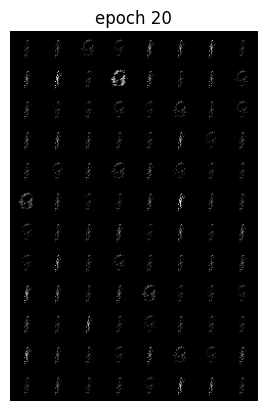

Epoch 20 of 100
Generator loss: 3.23839961, Discriminator loss: 0.28012539


118it [01:07,  1.74it/s]


Epoch 21 of 100
Generator loss: 3.67009187, Discriminator loss: 0.26860377


118it [01:05,  1.80it/s]


Epoch 22 of 100
Generator loss: 3.36080146, Discriminator loss: 0.33673674


118it [01:07,  1.76it/s]


Epoch 23 of 100
Generator loss: 3.43664284, Discriminator loss: 0.43716963


118it [01:05,  1.81it/s]


Epoch 24 of 100
Generator loss: 2.91994215, Discriminator loss: 0.40878256


118it [01:05,  1.79it/s]


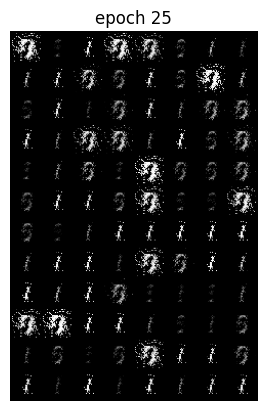

Epoch 25 of 100
Generator loss: 3.46380804, Discriminator loss: 0.47208002


118it [01:06,  1.78it/s]


Epoch 26 of 100
Generator loss: 3.40965774, Discriminator loss: 0.33162788


118it [01:05,  1.81it/s]


Epoch 27 of 100
Generator loss: 3.01216547, Discriminator loss: 0.46583285


118it [01:06,  1.77it/s]


Epoch 28 of 100
Generator loss: 3.09113796, Discriminator loss: 0.50538744


118it [01:05,  1.81it/s]


Epoch 29 of 100
Generator loss: 2.92838297, Discriminator loss: 0.51181336


118it [01:06,  1.77it/s]


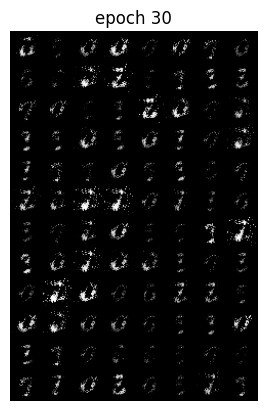

Epoch 30 of 100
Generator loss: 2.85669027, Discriminator loss: 0.44493425


118it [01:05,  1.80it/s]


Epoch 31 of 100
Generator loss: 3.05068783, Discriminator loss: 0.46436532


118it [01:06,  1.77it/s]


Epoch 32 of 100
Generator loss: 3.13824071, Discriminator loss: 0.50119846


118it [01:06,  1.79it/s]


Epoch 33 of 100
Generator loss: 3.36436172, Discriminator loss: 0.43776588


118it [01:06,  1.78it/s]


Epoch 34 of 100
Generator loss: 3.20624476, Discriminator loss: 0.51963263


118it [01:06,  1.77it/s]


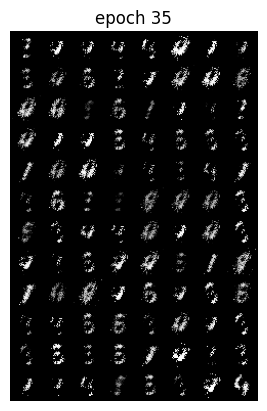

Epoch 35 of 100
Generator loss: 2.98836339, Discriminator loss: 0.48314254


118it [01:05,  1.80it/s]


Epoch 36 of 100
Generator loss: 3.37858009, Discriminator loss: 0.38092594


118it [01:07,  1.75it/s]


Epoch 37 of 100
Generator loss: 3.31528846, Discriminator loss: 0.39304039


118it [01:06,  1.78it/s]


Epoch 38 of 100
Generator loss: 3.32626883, Discriminator loss: 0.45509195


118it [01:07,  1.75it/s]


Epoch 39 of 100
Generator loss: 2.99764563, Discriminator loss: 0.50357586


118it [01:05,  1.80it/s]


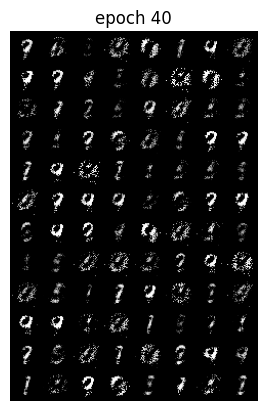

Epoch 40 of 100
Generator loss: 3.36713398, Discriminator loss: 0.45214784


118it [01:07,  1.75it/s]


Epoch 41 of 100
Generator loss: 3.14847390, Discriminator loss: 0.46967870


118it [01:05,  1.80it/s]


Epoch 42 of 100
Generator loss: 3.32384328, Discriminator loss: 0.39602114


118it [01:06,  1.77it/s]


Epoch 43 of 100
Generator loss: 3.41711906, Discriminator loss: 0.44830409


118it [01:05,  1.79it/s]


Epoch 44 of 100
Generator loss: 3.28674248, Discriminator loss: 0.44971492


118it [01:06,  1.76it/s]


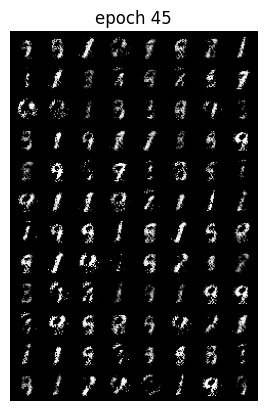

Epoch 45 of 100
Generator loss: 2.82307681, Discriminator loss: 0.60414286


118it [01:06,  1.78it/s]


Epoch 46 of 100
Generator loss: 2.67986573, Discriminator loss: 0.51229977


118it [01:06,  1.79it/s]


Epoch 47 of 100
Generator loss: 2.78209463, Discriminator loss: 0.56000076


118it [01:07,  1.75it/s]


Epoch 48 of 100
Generator loss: 2.86016521, Discriminator loss: 0.53482338


118it [01:06,  1.78it/s]


Epoch 49 of 100
Generator loss: 2.96141683, Discriminator loss: 0.50200302


118it [01:06,  1.77it/s]


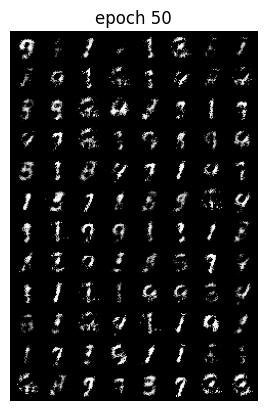

Epoch 50 of 100
Generator loss: 2.67206993, Discriminator loss: 0.55467457


118it [01:05,  1.80it/s]


Epoch 51 of 100
Generator loss: 2.80649277, Discriminator loss: 0.51989570


118it [01:07,  1.74it/s]


Epoch 52 of 100
Generator loss: 2.61340875, Discriminator loss: 0.59344012


118it [01:05,  1.79it/s]


Epoch 53 of 100
Generator loss: 2.65724423, Discriminator loss: 0.65046942


118it [01:07,  1.75it/s]


Epoch 54 of 100
Generator loss: 2.44109382, Discriminator loss: 0.62674711


118it [01:05,  1.80it/s]


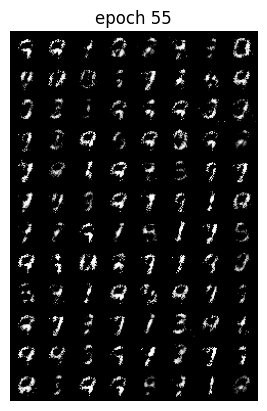

Epoch 55 of 100
Generator loss: 2.73276512, Discriminator loss: 0.58381984


118it [01:07,  1.75it/s]


Epoch 56 of 100
Generator loss: 2.52207732, Discriminator loss: 0.63498789


118it [01:06,  1.79it/s]


Epoch 57 of 100
Generator loss: 2.72299623, Discriminator loss: 0.57183660


118it [01:07,  1.75it/s]


Epoch 58 of 100
Generator loss: 2.55817329, Discriminator loss: 0.60516583


118it [01:06,  1.77it/s]


Epoch 59 of 100
Generator loss: 2.42089828, Discriminator loss: 0.62254876


118it [01:08,  1.74it/s]


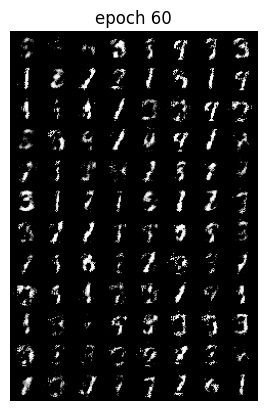

Epoch 60 of 100
Generator loss: 2.46022275, Discriminator loss: 0.64077354


118it [01:06,  1.79it/s]


Epoch 61 of 100
Generator loss: 2.65323364, Discriminator loss: 0.57318575


118it [01:07,  1.75it/s]


Epoch 62 of 100
Generator loss: 2.78915350, Discriminator loss: 0.57791379


118it [01:06,  1.78it/s]


Epoch 63 of 100
Generator loss: 2.65015114, Discriminator loss: 0.57158410


118it [01:07,  1.75it/s]


Epoch 64 of 100
Generator loss: 2.45020421, Discriminator loss: 0.62432013


118it [01:06,  1.78it/s]


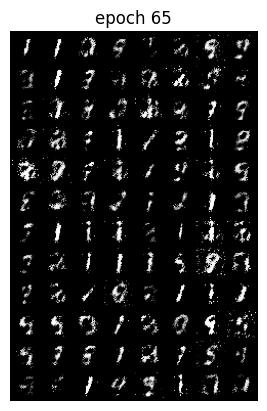

Epoch 65 of 100
Generator loss: 2.63843301, Discriminator loss: 0.58734663


118it [01:07,  1.75it/s]


Epoch 66 of 100
Generator loss: 2.70763255, Discriminator loss: 0.58285412


118it [01:06,  1.78it/s]


Epoch 67 of 100
Generator loss: 2.43223180, Discriminator loss: 0.67575681


118it [01:07,  1.74it/s]


Epoch 68 of 100
Generator loss: 2.44418968, Discriminator loss: 0.62753893


118it [01:06,  1.77it/s]


Epoch 69 of 100
Generator loss: 2.42940503, Discriminator loss: 0.66857558


118it [01:07,  1.74it/s]


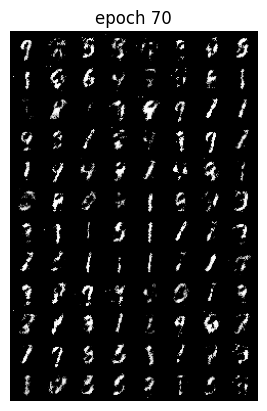

Epoch 70 of 100
Generator loss: 2.32162402, Discriminator loss: 0.71087367


118it [01:07,  1.76it/s]


Epoch 71 of 100
Generator loss: 2.23673590, Discriminator loss: 0.68245258


118it [01:07,  1.74it/s]


Epoch 72 of 100
Generator loss: 2.29024457, Discriminator loss: 0.68695443


118it [01:06,  1.77it/s]


Epoch 73 of 100
Generator loss: 2.31074015, Discriminator loss: 0.69942249


118it [01:08,  1.72it/s]


Epoch 74 of 100
Generator loss: 2.16248136, Discriminator loss: 0.72237071


118it [01:06,  1.76it/s]


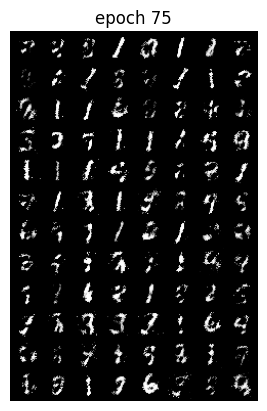

Epoch 75 of 100
Generator loss: 2.13465693, Discriminator loss: 0.71158153


118it [01:08,  1.72it/s]


Epoch 76 of 100
Generator loss: 2.29897709, Discriminator loss: 0.69644273


118it [01:06,  1.78it/s]


Epoch 77 of 100
Generator loss: 2.23146765, Discriminator loss: 0.70938108


118it [01:08,  1.72it/s]


Epoch 78 of 100
Generator loss: 2.26993738, Discriminator loss: 0.67494338


118it [01:07,  1.75it/s]


Epoch 79 of 100
Generator loss: 2.29345710, Discriminator loss: 0.70318313


118it [01:08,  1.71it/s]


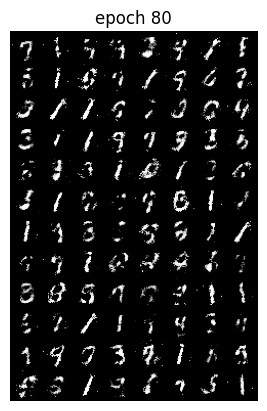

Epoch 80 of 100
Generator loss: 2.17817273, Discriminator loss: 0.73143918


118it [01:07,  1.76it/s]


Epoch 81 of 100
Generator loss: 2.09176155, Discriminator loss: 0.75092657


118it [01:08,  1.72it/s]


Epoch 82 of 100
Generator loss: 2.11041712, Discriminator loss: 0.74849299


118it [01:07,  1.75it/s]


Epoch 83 of 100
Generator loss: 2.17831919, Discriminator loss: 0.72236531


118it [01:07,  1.74it/s]


Epoch 84 of 100
Generator loss: 2.23904428, Discriminator loss: 0.67544523


118it [01:06,  1.77it/s]


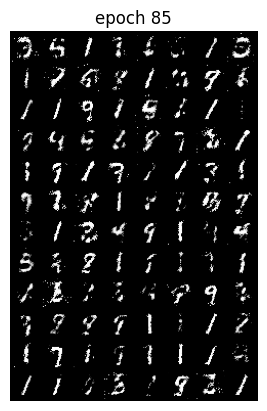

Epoch 85 of 100
Generator loss: 2.25287139, Discriminator loss: 0.68885003


118it [01:08,  1.73it/s]


Epoch 86 of 100
Generator loss: 2.16675717, Discriminator loss: 0.73776346


118it [01:07,  1.76it/s]


Epoch 87 of 100
Generator loss: 2.21249291, Discriminator loss: 0.72434407


118it [01:07,  1.75it/s]


Epoch 88 of 100
Generator loss: 2.10802568, Discriminator loss: 0.76414277


118it [01:07,  1.76it/s]


Epoch 89 of 100
Generator loss: 2.07137470, Discriminator loss: 0.76172522


118it [01:07,  1.75it/s]


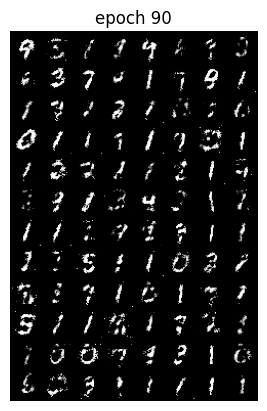

Epoch 90 of 100
Generator loss: 2.18051495, Discriminator loss: 0.72572079


118it [01:06,  1.77it/s]


Epoch 91 of 100
Generator loss: 2.13339187, Discriminator loss: 0.72551918


118it [01:07,  1.75it/s]


Epoch 92 of 100
Generator loss: 2.16351268, Discriminator loss: 0.74229502


118it [01:06,  1.79it/s]


Epoch 93 of 100
Generator loss: 1.99075419, Discriminator loss: 0.78225262


118it [01:08,  1.73it/s]


Epoch 94 of 100
Generator loss: 2.04320101, Discriminator loss: 0.75526917


118it [01:06,  1.78it/s]


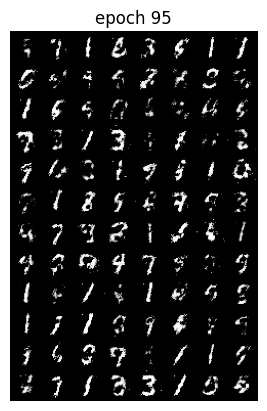

Epoch 95 of 100
Generator loss: 2.07532759, Discriminator loss: 0.75004925


118it [01:07,  1.74it/s]


Epoch 96 of 100
Generator loss: 1.98840575, Discriminator loss: 0.77556835


118it [01:06,  1.78it/s]


Epoch 97 of 100
Generator loss: 2.13180759, Discriminator loss: 0.74329043


118it [01:08,  1.73it/s]


Epoch 98 of 100
Generator loss: 2.00271302, Discriminator loss: 0.76300639


118it [01:06,  1.77it/s]


Epoch 99 of 100
Generator loss: 1.96917373, Discriminator loss: 0.79854326


118it [01:07,  1.74it/s]


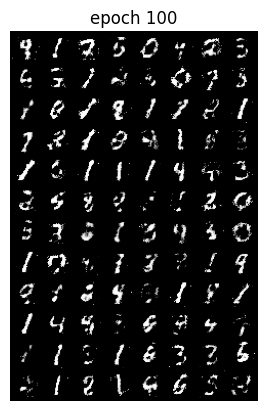

Epoch 100 of 100
Generator loss: 1.94564357, Discriminator loss: 0.78380837


In [20]:
torch.manual_seed(7777)
nz = 128
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    return criterion(output, true_label)

    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)


    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # Training the Discriminator
        real_images, _ = data
        optim_d.zero_grad()

        real_labels = torch.ones(real_images.size(0))
        fake_labels = torch.zeros(real_images.size(0))

        real_pred = discriminator(real_images.view(-1, 784))
        # print(real_pred.size, real_labels.size)
        real_loss = discriminator_loss(real_pred.squeeze(), real_labels)
        real_loss.backward()

        noise = torch.randn(real_images.size(0), nz)
        fake_images = generator(noise).detach()
        fake_pred = discriminator(fake_images)
        fake_loss = discriminator_loss(fake_pred.squeeze(), fake_labels)
        fake_loss.backward()

        optim_d.step()
        loss_d += (real_loss.item() + fake_loss.item())

        # Training the Generator
        optim_g.zero_grad()
        noise = torch.randn(real_images.size(0), nz)
        gen_labels = torch.ones(real_images.size(0))

        gen_pred = discriminator(generator(noise))
        gen_loss = generator_loss(gen_pred.squeeze(), gen_labels)
        gen_loss.backward()
        optim_g.step()
        loss_g += gen_loss.item()

        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [21]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [22]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

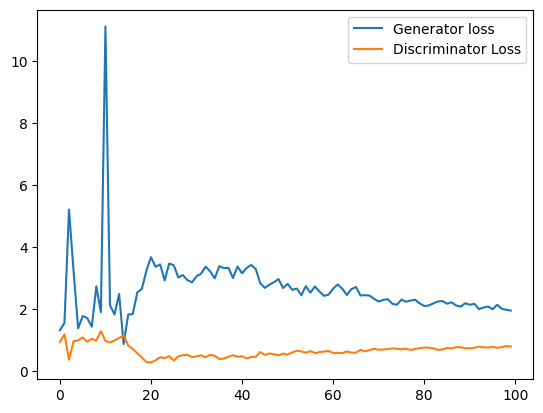

In [23]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

## Question 1. Part b - Updating the generator function by descending its stochastic gradient

118it [01:13,  1.62it/s]


Epoch 1 of 100
Generator loss: 0.00040245, Discriminator loss: 0.06358695


118it [01:22,  1.43it/s]


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:21,  1.44it/s]


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:22,  1.42it/s]


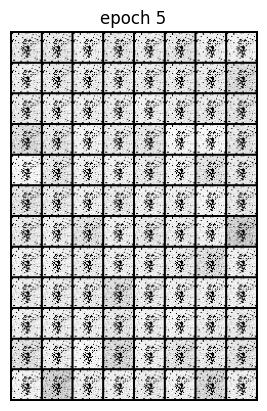

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:22,  1.43it/s]


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:22,  1.43it/s]


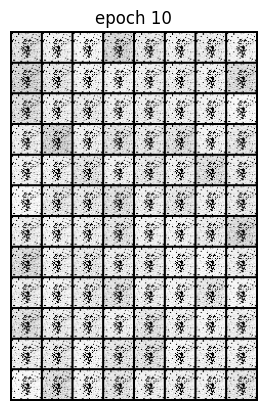

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.39it/s]


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.39it/s]


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.39it/s]


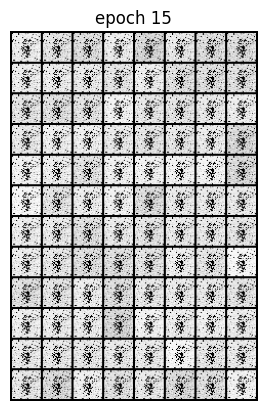

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


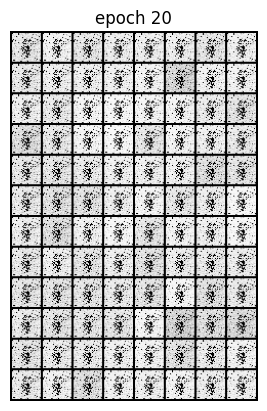

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.33it/s]


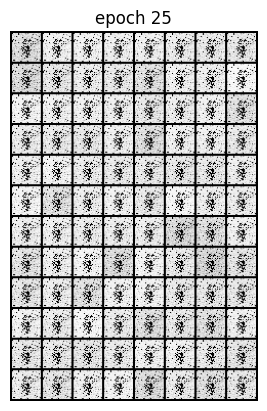

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.30it/s]


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.34it/s]


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


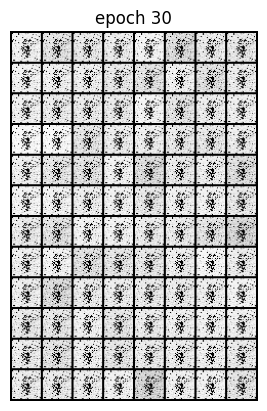

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.39it/s]


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.39it/s]


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.37it/s]


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.39it/s]


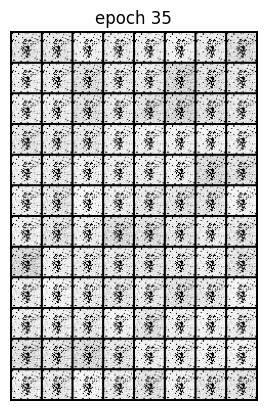

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:31,  1.29it/s]


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:33,  1.26it/s]


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.30it/s]


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:32,  1.28it/s]


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.32it/s]


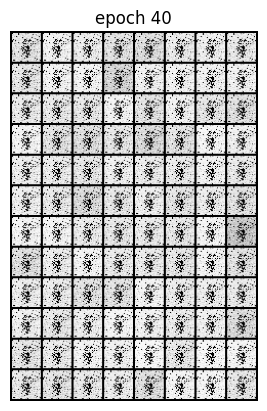

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.32it/s]


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.31it/s]


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:31,  1.28it/s]


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.32it/s]


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.34it/s]


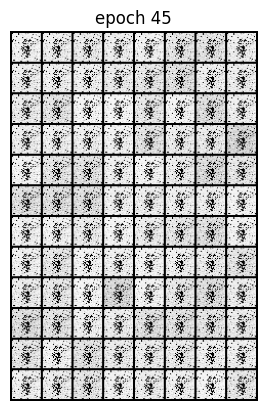

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.32it/s]


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.30it/s]


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.32it/s]


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.30it/s]


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:30,  1.30it/s]


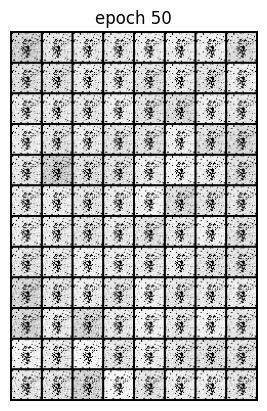

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.34it/s]


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.31it/s]


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.34it/s]


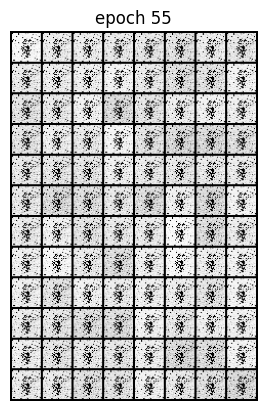

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:29,  1.33it/s]


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.33it/s]


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.33it/s]


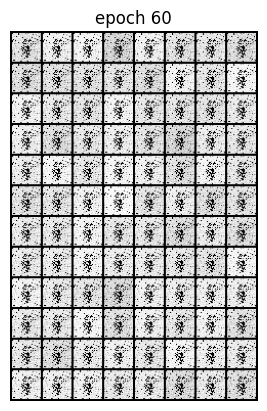

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.33it/s]


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.34it/s]


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:32,  1.28it/s]


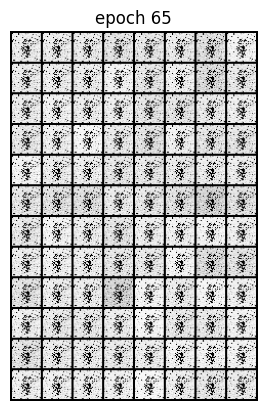

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.39it/s]


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.41it/s]


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.39it/s]


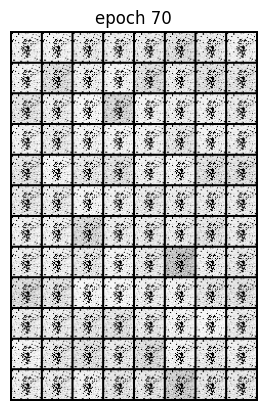

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:23,  1.42it/s]


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.37it/s]


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.37it/s]


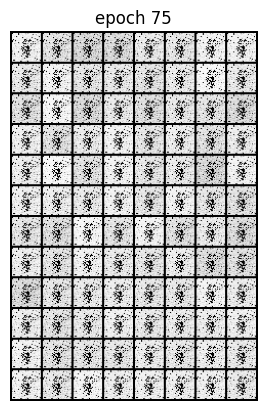

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.37it/s]


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.36it/s]


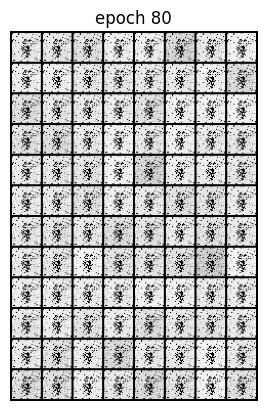

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.37it/s]


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.37it/s]


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


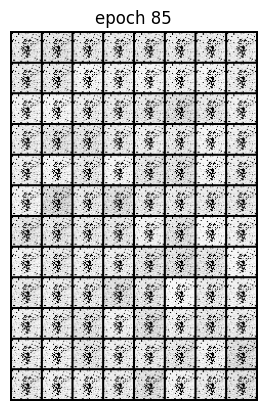

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.39it/s]


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


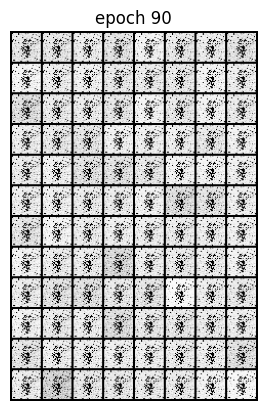

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.34it/s]


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.37it/s]


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:27,  1.35it/s]


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:24,  1.40it/s]


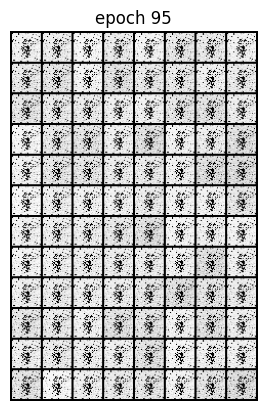

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.36it/s]


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:28,  1.33it/s]


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:25,  1.38it/s]


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:26,  1.37it/s]


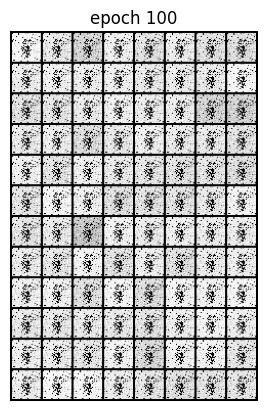

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [35]:
torch.manual_seed(7777)
nz = 128
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    return criterion(output, true_label)

    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)


    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # Training the Discriminator
        real_images, _ = data
        optim_d.zero_grad()

        real_labels = torch.ones(real_images.size(0))
        fake_labels = torch.zeros(real_images.size(0))

        real_pred = discriminator(real_images.view(-1, 784))
        # print(real_pred.size, real_labels.size)
        real_loss = discriminator_loss(real_pred.squeeze(), real_labels)
        real_loss.backward()

        noise = torch.randn(real_images.size(0), nz)
        fake_images = generator(noise).detach()
        fake_pred = discriminator(fake_images)
        fake_loss = discriminator_loss(fake_pred.squeeze(), fake_labels)
        fake_loss.backward()

        optim_d.step()
        loss_d += (real_loss.item() + fake_loss.item())

        # Training the Generator
        optim_g.zero_grad()
        noise = torch.randn(real_images.size(0), nz)
        gen_labels = torch.ones(real_images.size(0))

        gen_pred = discriminator(generator(noise))
        # print("Shape: ", noise.size())
        gen_loss = -torch.mean(torch.log(1 - gen_pred)) / nz
        # gen_loss = generator_loss(gen_pred.squeeze(), gen_labels)
        gen_loss.backward()
        optim_g.step()
        loss_g += gen_loss.item()

        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [36]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_part2.pth')

DONE TRAINING


In [37]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_part2.gif', imgs)

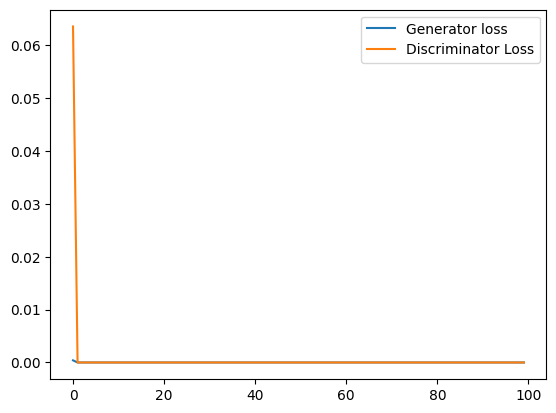

In [38]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_part2.png')